In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Oil production per capita.csv') # Data is in total number of barrels
df.head(10)

,Entity,Code,Year,Oil production per capita (kWh)
0,Africa,NaN,1900,0.0
1,Africa,NaN,1901,0.0
2,Africa,NaN,1902,0.0
3,Africa,NaN,1903,0.0
4,Africa,NaN,1904,0.0
5,Africa,NaN,1905,0.0
6,Africa,NaN,1906,0.0
7,Africa,NaN,1907,0.0
8,Africa,NaN,1908,0.0
9,Africa,NaN,1909,0.0


In [3]:
df['Entity'].unique()

array(['Africa', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chad',
       'Chile', 'China', 'Colombia', 'Congo', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Europe', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guatemala', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Libya', 'Lithuania', 'Malaysia', 'Malta', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Mya

## Visualising the trend of oil production per capita by individual country/region

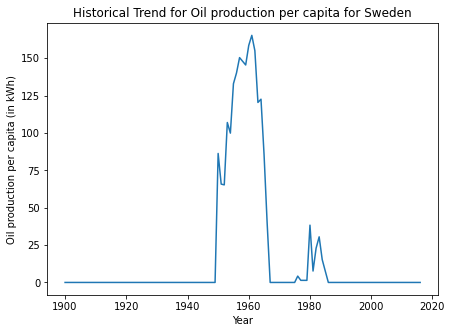

In [8]:
country_name = 'Sweden'

country = df.loc[df['Entity'] == country_name]
        
plt.figure(figsize = (7, 5))
        
plt.plot(country['Year'], country['Oil production per capita (kWh)'])
        
plt.title('Historical Trend for Oil production per capita for {0}'.format(country_name))
plt.xlabel('Year')
plt.ylabel('Oil production per capita (in kWh)')
        
plt.show()

## Splitting Data Frame into 2 Data Frames: 1 for regions, and 1 for individual countries

### Sort by region

In [9]:
non_countries = ['Africa', 'Europe', 'World']

In [10]:
df_region = df[df['Entity'].isin(non_countries)]
df_region

,Entity,Code,Year,Oil production per capita (kWh)
0,Africa,NaN,1900,0.000
1,Africa,NaN,1901,0.000
2,Africa,NaN,1902,0.000
3,Africa,NaN,1903,0.000
4,Africa,NaN,1904,0.000
...,...,...,...,...
9721,World,OWID_WRL,2016,6816.699
9722,World,OWID_WRL,2017,6757.585
9723,World,OWID_WRL,2018,6834.036
9724,World,OWID_WRL,2019,6751.697


### Sort by country

In [11]:
df_country = df[~df['Entity'].isin(non_countries)]
df_country

,Entity,Code,Year,Oil production per capita (kWh)
121,Albania,ALB,1900,0.0
122,Albania,ALB,1901,0.0
123,Albania,ALB,1902,0.0
124,Albania,ALB,1903,0.0
125,Albania,ALB,1904,0.0
...,...,...,...,...
9836,Zimbabwe,ZWE,2012,0.0
9837,Zimbabwe,ZWE,2013,0.0
9838,Zimbabwe,ZWE,2014,0.0
9839,Zimbabwe,ZWE,2015,0.0


## Top 10 Individual Countries with highest mean oil production per capita

In [13]:
hmopc = df_country.groupby(['Entity'])['Oil production per capita (kWh)'].mean()
top10mopc = hmopc.nlargest(10)
top10mopc

Entity
Kuwait                  811552.415769
United Arab Emirates    746730.513214
Qatar                   631900.774909
Brunei                  324292.728413
Saudi Arabia            313718.241089
Equatorial Guinea       129872.456034
Libya                   116060.856421
Venezuela                91785.780518
Norway                   86223.942231
Oman                     82707.789537
Name: Oil production per capita (kWh), dtype: float64

In [14]:
topcdf = pd.DataFrame(top10mopc)
topcdf

,Oil production per capita (kWh)
Entity,
Kuwait,811552.415769
United Arab Emirates,746730.513214
Qatar,631900.774909
Brunei,324292.728413
Saudi Arabia,313718.241089
Equatorial Guinea,129872.456034
Libya,116060.856421
Venezuela,91785.780518
Norway,86223.942231


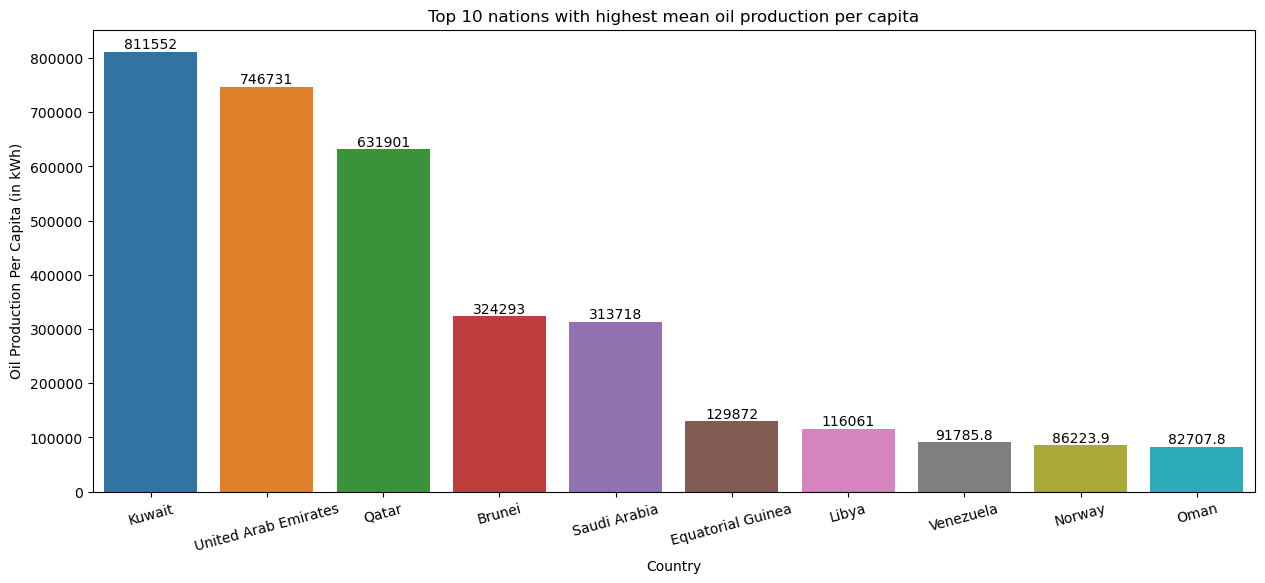

In [16]:
plt.figure(figsize = (15, 6))
plt.style.use('default')

ax = sns.barplot(x = topcdf.index, y = 'Oil production per capita (kWh)', data = topcdf)
ax.bar_label(ax.containers[0])

plt.title('Top 10 nations with highest mean oil production per capita')
plt.ylabel('Oil Production Per Capita (in kWh)')
plt.xlabel('Country')
plt.xticks(rotation = 15)

plt.show()

## Historical Trend of oil production per capita in top 10 countries (as of 2016) with highest oil production per capita

In [17]:
topc2016 = df_country.loc[df_country['Year'] == 2016]
topc10 = topc2016.nlargest(10, 'Oil production per capita (kWh)')
topc10

,Entity,Code,Year,Oil production per capita (kWh)
5595,Kuwait,KWT,2016,448916.398
7748,Qatar,QAT,2016,357500.943
9195,United Arab Emirates,ARE,2016,226586.933
7961,Saudi Arabia,SAU,2016,210318.701
7040,Norway,NOR,2016,200014.682
1624,Brunei,BRN,2016,163403.484
7161,Oman,OMN,2016,128046.262
3277,Equatorial Guinea,GNQ,2016,99000.051
2016,Canada,CAN,2016,69954.948
4935,Iraq,IRQ,2016,69125.125


In [18]:
df_topc10 = df_country[df_country['Entity'].isin(topc10['Entity'].values)]
df_topc10

,Entity,Code,Year,Oil production per capita (kWh)
1508,Brunei,BRN,1900,0.000
1509,Brunei,BRN,1901,0.000
1510,Brunei,BRN,1902,0.000
1511,Brunei,BRN,1903,0.000
1512,Brunei,BRN,1904,0.000
...,...,...,...,...
9195,United Arab Emirates,ARE,2016,226586.933
9196,United Arab Emirates,ARE,2017,216026.617
9197,United Arab Emirates,ARE,2018,213360.326
9198,United Arab Emirates,ARE,2019,214904.377


### Rearranging list for ordered plt.legend()

In [19]:
entity_sort = list(topc10.sort_values('Entity')['Entity'].values)
entity_sort

['Brunei',
 'Canada',
 'Equatorial Guinea',
 'Iraq',
 'Kuwait',
 'Norway',
 'Oman',
 'Qatar',
 'Saudi Arabia',
 'United Arab Emirates']

In [29]:
new_sort = list(topc10['Entity'])
new_sort 

['Kuwait',
 'Qatar',
 'United Arab Emirates',
 'Saudi Arabia',
 'Norway',
 'Brunei',
 'Oman',
 'Equatorial Guinea',
 'Canada',
 'Iraq']

In [30]:
ord_list = []

for item in new_sort:
    if item in entity_sort:
        ord_list.append(entity_sort.index(item))
    
ord_list

[4, 7, 9, 8, 5, 0, 6, 2, 1, 3]

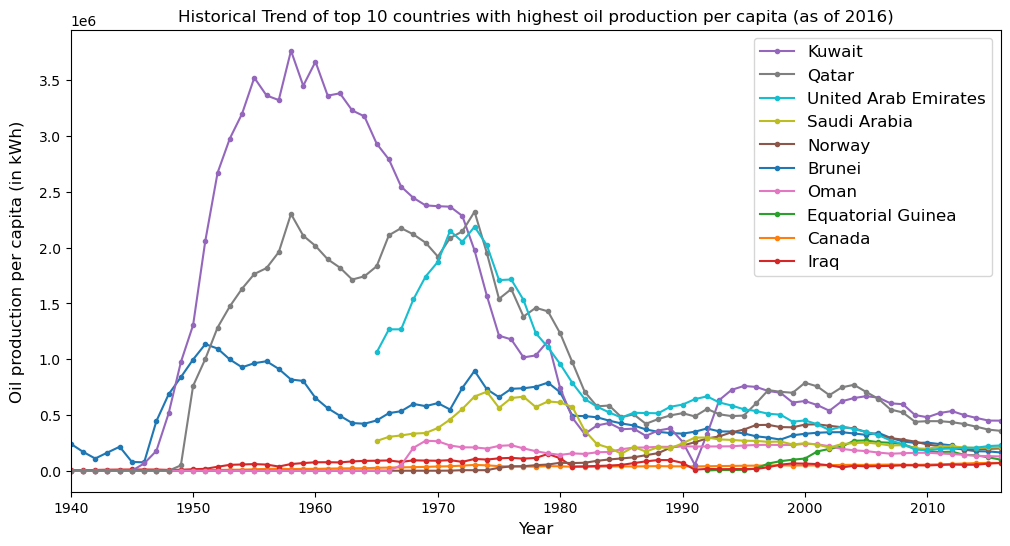

In [34]:
fig, ax = plt.subplots(figsize = (12, 6))

for opc, group in df_topc10.groupby('Entity'):
    group.plot(x = 'Year', y = 'Oil production per capita (kWh)', ax = ax, label = opc, marker = '.')

plt.title('Historical Trend of top 10 countries with highest oil production per capita (as of 2016)')
plt.ylabel('Oil production per capita (in kWh)', labelpad = 10, fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.xlim(1940, 2016)

handles, labels = plt.gca().get_legend_handles_labels()
order = ord_list
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper right', fontsize = 12)

plt.show()

## Historical Trend of oil production per capita in different regions of the world

In [38]:
df_region

,Entity,Code,Year,Oil production per capita (kWh)
0,Africa,NaN,1900,0.000
1,Africa,NaN,1901,0.000
2,Africa,NaN,1902,0.000
3,Africa,NaN,1903,0.000
4,Africa,NaN,1904,0.000
...,...,...,...,...
9721,World,OWID_WRL,2016,6816.699
9722,World,OWID_WRL,2017,6757.585
9723,World,OWID_WRL,2018,6834.036
9724,World,OWID_WRL,2019,6751.697


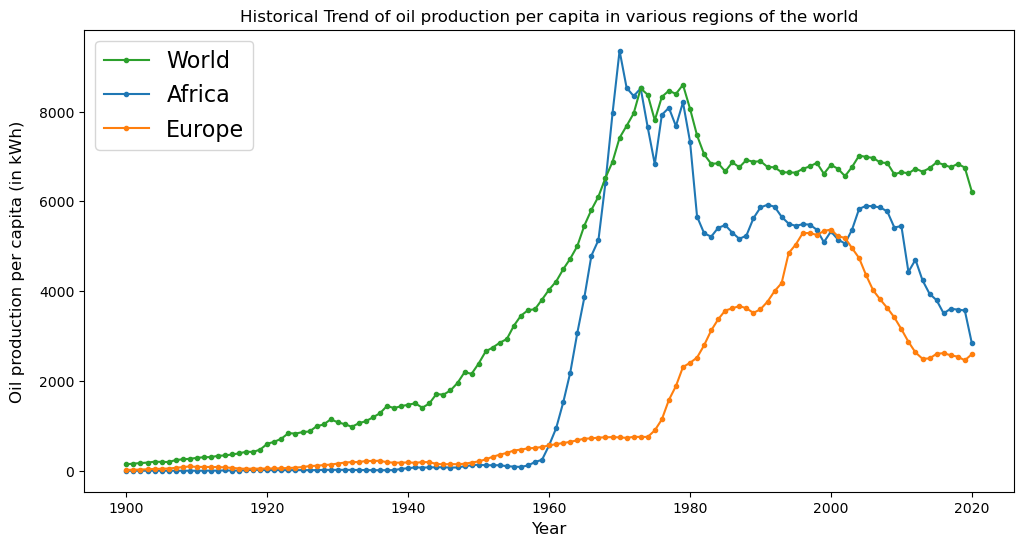

In [42]:
fig, ax = plt.subplots(figsize = (12, 6))

for opr, group in df_region.groupby('Entity'):
    group.plot(x = 'Year', y = 'Oil production per capita (kWh)', ax = ax, label = opr, marker = '.')

plt.title('Historical Trend of oil production per capita in various regions of the world')
plt.ylabel('Oil production per capita (in kWh)', labelpad = 10, fontsize = 12)
plt.xlabel('Year', fontsize = 12)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 0, 1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper left', fontsize = 16)

plt.show()